Dataset: E-Commerce Shipping Data from Kaggle: https://www.kaggle.com/prachi13/customer-analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.inspection import permutation_importance
import pickle

ID: ID Number of Customers.

• Warehouse block: The Company has a big Warehouse which is divided into blocks A,B,C,D,E.

• Mode of shipment: The Company ships the products in multiple ways such as Ship, Flight and Road.

• Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

• Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

• Cost of the product: Cost of the Product in US Dollars.

• Prior purchases: The Number of Prior Purchase.

• Product importance: The company has categorized the product in the various parameter such as low, medium, high.

• Gender: Male and Female.

• Discount offered: Discount offered on that specific product.

• Weight in gms: It is the weight in grams.

• Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 
indicates it has reached on time.

# Wrangle Data

In [2]:
def wrangle(filepath):
    
    # Load data
    df = pd.read_csv(filepath, index_col="ID")
    
    # Switch binary values in target variable
    mask = df["Reached.on.Time_Y.N"] == 1
    df.loc[mask, "Reached_on_time"] = 0
    df.loc[~mask, "Reached_on_time"] = 1
    
    # Drop redundant columns
    df.drop(columns=["Reached.on.Time_Y.N"], inplace=True)
    
    return df

In [3]:
df = wrangle("shipping_data.csv")

In [4]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,0.0
2,F,Flight,4,5,216,2,low,M,59,3088,0.0
3,A,Flight,2,2,183,4,low,M,48,3374,0.0
4,B,Flight,3,3,176,4,medium,M,10,1177,0.0
5,C,Flight,2,2,184,3,medium,F,46,2484,0.0


In [5]:
df.shape

(10999, 11)

In [6]:
df.to_csv(r"dash_ready_data.csv")

# Split Data

In [7]:
X = df.drop(columns="Reached_on_time")
y = df["Reached_on_time"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Establish Baseline

In [9]:
baseline_accuracy = y.value_counts(normalize=True).max()
baseline_accuracy

0.5966906082371125

In [10]:
X["Mode_of_Shipment"].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

# Build Model

In [11]:
# Logistic Regression
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression()
)

model_lr.fit(X_train, y_train)

/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Warehouse_block', 'Mode_of_Shipment',
                                     'Product_importance', 'Gender'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [12]:
# Random Forest Classifier
model_rfc = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

model_rfc.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment',
                                      'Product_importance', 'Gender'],
                                mapping=[{'col': 'Warehouse_block',
                                          'data_type': dtype('O'),
                                          'mapping': F      1
A      2
D      3
C      4
B      5
NaN   -2
dtype: int64},
                                         {'col': 'Mode_of_Shipment',
                                          'data_type': dtype('O'),
                                          'mapping': Ship      1
Flight    2
Road      3
NaN      -2
dtype: int64},
                                         {'col': 'Product_importance',
                                          'data_type': dtype('O'),
                                          'mapping': low       1
medium    2
high      3
NaN      -2
dtype: int64},
                                         {'col': 'Gend

In [13]:
# Gradient Boosting Classifier
model_gbc = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)

model_gbc.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment',
                                      'Product_importance', 'Gender'],
                                mapping=[{'col': 'Warehouse_block',
                                          'data_type': dtype('O'),
                                          'mapping': F      1
A      2
D      3
C      4
B      5
NaN   -2
dtype: int64},
                                         {'col': 'Mode_of_Shipment',
                                          'data_type': dtype('O'),
                                          'mapping': Ship      1
Flight    2
Road      3
NaN      -2
dtype: int64},
                                         {'col': 'Product_importance',
                                          'data_type': dtype('O'),
                                          'mapping': low       1
medium    2
high      3
NaN      -2
dtype: int64},
                                         {'col': 'Gend

# Check Metrics

In [14]:
# Out of the box score
print("Logistic Regression Accuracy (Train): ", model_lr.score(X_train, y_train))
print("Logistic Regression Accuracy (Test): ", model_lr.score(X_test, y_test))

Logistic Regression Accuracy (Train):  0.6407546312080918
Logistic Regression Accuracy (Test):  0.644090909090909


In [15]:
# Out of the box score
print("Random Forest Accuracy (Train): ", model_rfc.score(X_train, y_train))
print("Random Forest Accuracy (Test): ", model_rfc.score(X_test, y_test))

Random Forest Accuracy (Train):  1.0
Random Forest Accuracy (Test):  0.6631818181818182


In [16]:
# Out of the box score
print("Gradient Boosting Accuracy (Train): ", model_gbc.score(X_train, y_train))
print("Gradient Boosting Accuracy (Test): ", model_gbc.score(X_test, y_test))

Gradient Boosting Accuracy (Train):  0.7140584157290601
Gradient Boosting Accuracy (Test):  0.6836363636363636


# Tune Parameters

• permutation importance

In [17]:
param_grid = {
    "gradientboostingclassifier__loss": ["deviance", "exponential"],
    "gradientboostingclassifier__n_estimators": [100, 200, 300],
    "gradientboostingclassifier__criterion": ["friedman_mse", "mse"],
    "gradientboostingclassifier__max_depth": [3, 5, 8, 10]
}

In [18]:
# RandomizedSearchCV

model_gbc_rs = RandomizedSearchCV(model_gbc,
                                  param_distributions=param_grid,
                                  n_jobs=-1, 
                                  cv=3, 
                                  verbose=5)

model_gbc_rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: F

/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['Warehouse_block',
                                                                   'Mode_of_Shipment',
                                                                   'Product_importance',
                                                                   'Gender'],
                                                             mapping=[{'col': 'Warehouse_block',
                                                                       'data_type': dtype('O'),
                                                                       'mapping': F      1
A      2
D      3
C      4
B      5
NaN   -2
dtype: int64},
                                                                      {'col': 'Mode_of_Shipment',
                                                                       'data_type': dtype('O'),
                                 

In [19]:
model_gbc_rs.best_params_

{'gradientboostingclassifier__n_estimators': 200,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__criterion': 'mse'}

In [20]:
best_model_rs = model_gbc_rs.best_estimator_

In [21]:
# GridSearchCV

model_gbc_gs = GridSearchCV(model_gbc,
                            param_grid=param_grid,
                            n_jobs=-1,
                            cv=3,
                            verbose=5)

model_gbc_gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: F

/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: F

/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: F

/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: F

/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/Shipping_Dashboard-Ne9HZrax/lib/python3.9/site-packages/category_encoders/utils.py:21: F

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['Warehouse_block',
                                                             'Mode_of_Shipment',
                                                             'Product_importance',
                                                             'Gender'],
                                                       mapping=[{'col': 'Warehouse_block',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': F      1
A      2
D      3
C      4
B      5
NaN   -2
dtype: int64},
                                                                {'col': 'Mode_of_Shipment',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': Ship      1
Flight    2

In [22]:
model_gbc_gs.best_params_

{'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__loss': 'exponential',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__n_estimators': 100}

In [23]:
best_model_gs = model_gbc_gs.best_estimator_

In [24]:
# Scores before Tuning
print("Gradient Boosting Accuracy (Train): ", model_gbc.score(X_train, y_train))
print("Gradient Boosting Accuracy (Test): ", model_gbc.score(X_test, y_test))

Gradient Boosting Accuracy (Train):  0.7140584157290601
Gradient Boosting Accuracy (Test):  0.6836363636363636


In [25]:
# Scores after RandomizedSearchCV
print("Gradient Boosting Accuracy (Train): ", best_model_rs.score(X_train, y_train))
print("Gradient Boosting Accuracy (Test): ", best_model_rs.score(X_test, y_test))

Gradient Boosting Accuracy (Train):  0.7409932946925787
Gradient Boosting Accuracy (Test):  0.6795454545454546


In [26]:
# Scores after GridSearchCV
print("Gradient Boosting Accuracy (Train): ", best_model_gs.score(X_train, y_train))
print("Gradient Boosting Accuracy (Test): ", best_model_gs.score(X_test, y_test))

Gradient Boosting Accuracy (Train):  0.7136038186157518
Gradient Boosting Accuracy (Test):  0.6859090909090909


# Communicate Results

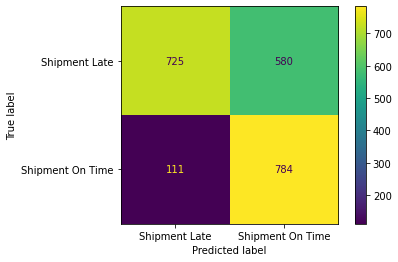

In [27]:
# CONFUSION MATRIX
plot_confusion_matrix(best_model_gs, X_test, y_test, values_format=".0f",
                      display_labels=["Shipment Late", "Shipment On Time"])

In [28]:
f1_score(y_test, best_model_gs.predict(X_test))

0.6941124391323594

<AxesSubplot:>

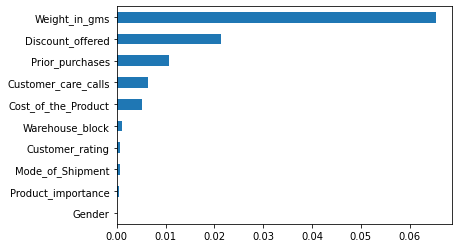

In [29]:
# PERMUTATION IMPORTANCE
perm_imp = permutation_importance(best_model_gs, X_test, y_test, n_repeats=10,
                                  n_jobs=-1, random_state=42)

data = {"imp_mean": perm_imp["importances_mean"],
        "imp_std": perm_imp["importances_std"]}

df_perm = pd.DataFrame(data, index=X_test.columns).sort_values("imp_mean")

df_perm["imp_mean"].tail(10).plot(kind="barh")

## Pickle Model

In [30]:
filename = "gbc_gs.pk1"
pickle.dump(best_model_gs, open(filename, 'wb'))

[CV 2/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=exponential, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=300;, score=0.648 total time=  13.8s
[CV 1/3] END gradientboostingclassifier__criterion=mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=100;, score=0.665 total time=   2.7s
[CV 1/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=300;, score=0.651 total time=  12.1s
[CV 3/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=200;, score=0.667 total time=   1.8s
[CV 2/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__los

[CV 1/3] END gradientboostingclassifier__criterion=mse, gradientboostingclassifier__loss=exponential, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=300;, score=0.659 total time=   4.4s
[CV 2/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=exponential, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=300;, score=0.643 total time=   9.2s
[CV 1/3] END gradientboostingclassifier__criterion=mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=300;, score=0.663 total time=   2.7s
[CV 1/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=200;, score=0.661 total time=   3.0s
[CV 2/3] END gradientboostingclassifier__criterion=mse, gradientboostingclassifier__loss=deviance, gradi

[CV 1/3] END gradientboostingclassifier__criterion=mse, gradientboostingclassifier__loss=exponential, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=300;, score=0.660 total time=  14.0s
[CV 2/3] END gradientboostingclassifier__criterion=mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=100;, score=0.654 total time=   2.7s
[CV 2/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=300;, score=0.654 total time=  11.5s
[CV 1/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=300;, score=0.663 total time=   2.7s
[CV 2/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=devianc

[CV 1/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=exponential, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=300;, score=0.649 total time=  13.7s
[CV 3/3] END gradientboostingclassifier__criterion=mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=300;, score=0.662 total time=   2.7s
[CV 3/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=200;, score=0.645 total time=   3.0s
[CV 1/3] END gradientboostingclassifier__criterion=mse, gradientboostingclassifier__loss=deviance, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=300;, score=0.655 total time=  10.9s
[CV 2/3] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__loss=devianc